In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/jigsaw-toxic-comment-classification-challenge/sample_submission.csv
/kaggle/input/jigsaw-toxic-comment-classification-challenge/test_labels.csv
/kaggle/input/jigsaw-toxic-comment-classification-challenge/train.csv
/kaggle/input/jigsaw-toxic-comment-classification-challenge/test.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/kaggle/input/jigsaw-toxic-comment-classification-challenge/train.csv')
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [7]:
df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

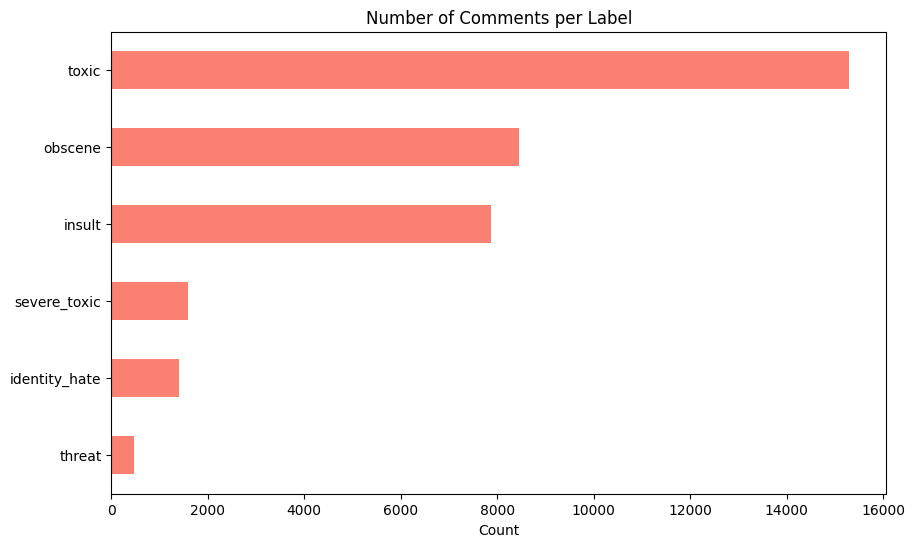

In [9]:
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
df[labels].sum().sort_values().plot(kind='barh', figsize=(10,6), color='salmon')
plt.title("Number of Comments per Label")
plt.xlabel("Count")
plt.show()

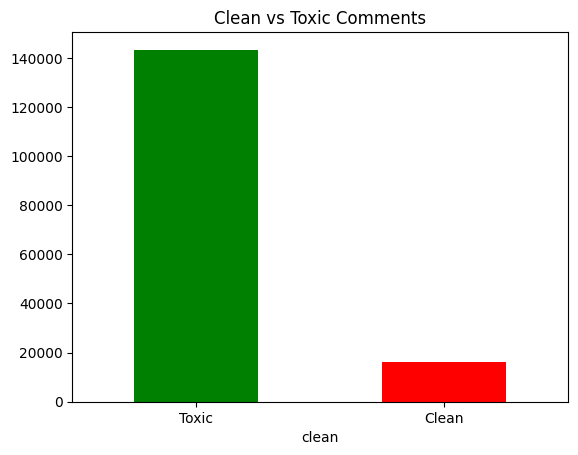

In [10]:
df['clean'] = (df[labels].sum(axis=1) == 0)
df['clean'].value_counts().plot(kind='bar', color=['green','red'])
plt.title("Clean vs Toxic Comments")
plt.xticks([0, 1], ['Toxic', 'Clean'], rotation=0)
plt.show()

In [11]:
import re

def clean_text(text):
    text = re.sub(r'[^a-zA-Z ]', '', text)
    return text.lower()

df['comment_text'] = df['comment_text'].fillna('').apply(clean_text)

In [12]:
from sklearn.model_selection import train_test_split

X = df['comment_text']
y = df[labels]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=10000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

model = OneVsRestClassifier(LogisticRegression(max_iter=200))
model.fit(X_train_vec, y_train)

OneVsRestClassifier(estimator=LogisticRegression(max_iter=200))

In [16]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_test_vec)

for i, label in enumerate(labels):
    print(f"\nLabel: {label}")
    print(classification_report(y_test[label], y_pred[:, i]))


Label: toxic
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     28859
           1       0.90      0.61      0.73      3056

    accuracy                           0.96     31915
   macro avg       0.93      0.80      0.85     31915
weighted avg       0.95      0.96      0.95     31915


Label: severe_toxic
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     31594
           1       0.58      0.22      0.32       321

    accuracy                           0.99     31915
   macro avg       0.78      0.61      0.66     31915
weighted avg       0.99      0.99      0.99     31915


Label: obscene
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     30200
           1       0.91      0.61      0.73      1715

    accuracy                           0.98     31915
   macro avg       0.94      0.80      0.86     31915
weighted avg       0.97

In [17]:
comment = ["You are the worst. I hate you!"]
comment_clean = [clean_text(comment[0])]
vec = vectorizer.transform(comment_clean)
model.predict(vec)

array([[1, 0, 0, 0, 1, 0]])